In [1]:
# Standard Imports
import sys
import geopandas as gpd
from geowrangler.validation import GeometryValidation

# Google Cloud Imports

In [2]:
# Util imports
sys.path.append("../../")  # include parent directory
from src.settings import GEOJSON_DATA_DIR, PARQUET_DATA_DIR, GPKG_DATA_DIR
from src.duckdb_utils import create_default_connection

In [3]:
# Variables
SILUP_DIR = GEOJSON_DATA_DIR / "SILUP"
STRATA_DIR = PARQUET_DATA_DIR / "pre-strata"

# GCS Variables
STRATA_GCS_DIR = "gs://00_extract_vectors/"
SILUP_GCS_DIR = "gs://silup-gis/onebase/"

# BigQuery Variables
SRC_DATASET_ID = "biomass_inventory"
DATASET_ID = "carbon_stock"
IF_EXISTS = "replace"

# Load Data

## Strata

In [ ]:
# file_list = list(pathlib.Path(STRATA_DIR).glob('*'))

In [ ]:
# dfs = [pd.read_parquet(file) for file in file_list]
# strata_df = pd.concat(dfs)

In [ ]:
# strata_df.columns

In [ ]:
# strata_dipterocarp = strata_df[strata_df['strata'].isin(['pre_strata_1','pre_strata_2','pre_strata_3'])]

In [ ]:
# strata_gdf = gpd.GeoDataFrame(strata_dipterocarp, geometry=gpd.GeoSeries.from_wkt(strata_dipterocarp['geometry']), crs="EPSG:4326")

In [4]:
strata_gdf = gpd.read_file(
    GPKG_DATA_DIR / "pre_strata_dipterocarp_20240802.gpkg", driver="GPKG"
)

In [5]:
province = gpd.read_file(
    "/Users/renflores/Documents/OneBase/data/shp/admin1/geoBoundaries-PHL-ADM1.shp",
    driver="ESRI Shapefile",
)

In [6]:
caraga = province.loc[province["shapeISO"] == "PH-13"]

In [25]:
caraga_df = caraga.copy()

In [26]:
caraga_df["geometry"] = caraga_df["geometry"].to_wkt()

/var/folders/j7/qhtl5rxn31ng6n_d889xc4n40000gn/T/ipykernel_1890/2511299748.py:1: UserWarning: Geometry column does not contain geometry.
  caraga_df['geometry'] = caraga_df['geometry'].to_wkt()


In [ ]:
# strata_gdf = strata_gdf.sjoin(caraga, how='inner', predicate='intersects')

In [ ]:
# strata_gdf = strata_gdf.explode(index_parts=False)

In [ ]:
# strata_gdf.reset_index(drop=True, inplace=True)

In [ ]:
# strata_gdf = strata_gdf[['lcc', 'strata', 'geometry']].copy()

In [ ]:
# strata_gdf.to_crs("EPSG:3123", inplace=True)

In [ ]:
# strata_gdf['geometry'] = strata_gdf.simplify(0.01)

In [ ]:
# strata_gdf.to_crs("EPSG:4326", inplace=True)

In [ ]:
# strata_gdf =  GeometryValidation(strata_gdf).validate_all()

In [ ]:
# subset_strata_gdf = strata_gdf[~strata_gdf.all(axis=1)]
# subset_strata_gdf.to_file(TMP_OUT_DIR / "subset_strata.gpkg", driver="GPKG")

In [ ]:
# false_counts = subset_strata_gdf.apply(lambda x: (x == False).sum())

In [ ]:
# false_counts

In [ ]:
# strata_gdf['geometry'] = strata_gdf.buffer(0)

In [ ]:
# strata_gdf.to_file(GPKG_DATA_DIR / "pre_strata_dipterocarp_20240802.gpkg", driver="GPKG")

In [7]:
strata_df = strata_gdf.copy()

In [8]:
strata_df["geometry"] = strata_df["geometry"].to_wkt()

/var/folders/j7/qhtl5rxn31ng6n_d889xc4n40000gn/T/ipykernel_1890/3433223003.py:1: UserWarning: Geometry column does not contain geometry.
  strata_df['geometry'] = strata_df['geometry'].to_wkt()


In [10]:
strata_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1583395 entries, 0 to 1583394
Data columns (total 8 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   lcc                       1583395 non-null  object  
 1   strata                    1583395 non-null  object  
 2   is_not_null               1583395 non-null  bool    
 3   is_not_self_intersecting  1583395 non-null  bool    
 4   is_oriented_properly      1583395 non-null  bool    
 5   is_within_crs_bounds      1583395 non-null  bool    
 6   area_is_not_zero          1583395 non-null  bool    
 7   geometry                  1583395 non-null  geometry
dtypes: bool(5), geometry(1), object(2)
memory usage: 43.8+ MB


In [12]:
strata_gdf.shape

(1583395, 8)

In [13]:
strata_gdf = strata_gdf[strata_gdf.geometry.is_valid].copy()

In [14]:
strata_gdf.shape

(1583395, 8)

In [ ]:
strata_gdf.strata.value_counts()

In [ ]:
# strata_df.to_gbq(f"strata.pre_strata_dipterocarp",
#         project_id=GCP_PROJ_ID,
#         if_exists="replace")

In [ ]:
# query = f"""
#     SELECT
#         *EXCEPT(geometry),
#         ST_GEOGFROMTEXT(geometry,
#             oriented => FALSE,
#             make_valid => TRUE)
#     FROM {GCP_PROJ_ID}.strata.pre_strata_dipterocarp"""

# # Read the BigQuery table into a dataframe
# strata_df = pandas_gbq.read_gbq(query, project_id=GCP_PROJ_ID)
# plot_info.to_csv(PLOT_INFO_CSV, index=False)

## Activity Areas -- file manually generated by kahlil

In [ ]:
# activity_area_gdf = gpd.read_file(GPKG_DATA_DIR / "silup_optimized.gpkg")

In [ ]:
# activity_area_gdf.head(2)

In [ ]:
# activity_area_gdf = activity_area_gdf[['CADT',"ELI_TYPE","geometry"]].copy()

In [ ]:
# activity_area_gdf['UID'] = activity_area_gdf.reset_index().apply(lambda row: f"{row['CADT']}_{row['ELI_TYPE']}_{row['index']}", axis=1)

In [ ]:
# activity_area_gdf_val = GeometryValidation(activity_area_gdf).validate_all()

In [ ]:
# activity_area_gdf = activity_area_gdf_val.dissolve(by=['CADT',"ELI_TYPE"]).reset_index()

In [15]:
activity_area_gdf = gpd.read_file(
    GPKG_DATA_DIR / "silup_optimized_validated.gpkg", driver="GPKG"
)

In [44]:
activity_area_gdf = activity_area_gdf.explode(index_parts=False)

In [55]:
activity_area_gdf = GeometryValidation(activity_area_gdf).validate_all()

In [58]:
activity_area_gdf[activity_area_gdf.geometry.is_valid]

,CADT,ELI_TYPE,is_not_null,is_not_self_intersecting,is_oriented_properly,is_within_crs_bounds,area_is_not_zero,geometry


In [65]:
activity_area_gdf["geometry"] = activity_area_gdf.buffer(0)

In [81]:
from shapely.geometry import Polygon

In [82]:
def polygon_z_to_2d(geom):
    if geom.has_z:
        return Polygon([(x, y) for x, y, z in geom.exterior.coords])
    return geom

In [83]:
# Apply the conversion to the GeoDataFrame
activity_area_gdf["geometry"] = activity_area_gdf["geometry"].apply(polygon_z_to_2d)

In [84]:
activity_area_df = activity_area_gdf.copy()

In [85]:
activity_area_df["geometry"] = activity_area_gdf["geometry"].to_wkt()

/var/folders/j7/qhtl5rxn31ng6n_d889xc4n40000gn/T/ipykernel_1890/3802205760.py:1: UserWarning: Geometry column does not contain geometry.
  activity_area_df['geometry'] = activity_area_gdf['geometry'].to_wkt()


In [ ]:
# activity_area_gdf.to_file(GPKG_DATA_DIR / "silup_optimized_validated.gpkg", driver="GPKG")

## Initialize duckdb and load data

In [18]:
db = create_default_connection()

In [19]:
query = """ 
CREATE OR REPLACE TABLE strata_dipterocarp AS 
SELECT 
    strata, 
    lcc, 
    ST_GeomFromText(geometry) as geometry 
FROM 
    strata_df
"""

In [20]:
db.execute(query)

In [86]:
query = """
CREATE OR REPLACE TABLE activity_area AS 
SELECT 
    CADT, 
    ELI_TYPE, 
    ST_GeomFromText(geometry) as geometry FROM activity_area_df
"""

In [87]:
db.execute(query)

In [33]:
query = """
CREATE OR REPLACE TABLE caraga AS 
SELECT 
    *EXCLUDE(geometry),
    ST_GeomFromText(geometry) as geometry
FROM caraga_df
"""

In [34]:
db.execute(query)

In [37]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
result = db.execute(query).df()

In [38]:
result

,name
0,activity_area
1,caraga
2,caraga_strata
3,strata_dipterocarp


# Join activity data and strata

In [ ]:
caraga_strata = "NULL"

In [35]:
query = """ CREATE OR REPLACE TABLE caraga_strata AS 
SELECT
    strata_dipterocarp.*
FROM strata_dipterocarp, 
    caraga 
WHERE ST_Intersects(strata_dipterocarp.geometry, caraga.geometry)"""

In [36]:
db.execute(query)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [99]:
db.execute("EXPORT DATABASE 'strata.duckdb'")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [100]:
query = """
SELECT 
    activity_area.CADT,
    activity_area.ELI_TYPE,
    caraga_strata.strata,
    ST_AsText(ST_Intersection(activity_area.geometry, caraga_strata.geometry)) as geometry
FROM activity_area
JOIN caraga_strata ON ST_Intersects(caraga_strata.geometry, activity_area.geometry)
WHERE activity_area.ELI_TYPE = 'APD'
"""

In [101]:
intersection = db.execute(query).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [103]:
intersection_gdf = gpd.GeoDataFrame(
    intersection,
    geometry=gpd.GeoSeries.from_wkt(intersection["geometry"]),
    crs="EPSG:4326",
)

In [105]:
intersection_gdf

,CADT,ELI_TYPE,geometry
0,118,APD,"POLYGON ((125.31286 8.70189, 125.31292 8.70189..."
1,118,APD,"POLYGON ((125.30142 8.70004, 125.30142 8.70000..."
2,118,APD,"POLYGON ((125.31588 8.70009, 125.31606 8.70009..."
3,118,APD,"POLYGON ((125.30197 8.69937, 125.30196 8.69937..."
4,118,APD,"POLYGON ((125.30142 8.69928, 125.30151 8.69928..."
...,...,...,...
25163,238,APD,"POLYGON ((125.85916 9.15129, 125.85921 9.15117..."
25164,238,APD,"POLYGON ((125.85416 9.14895, 125.85418 9.14889..."
25165,238,APD,"POLYGON ((125.84583 9.10608, 125.84625 9.10645..."
25166,092,APD,"POLYGON ((125.66977 9.10851, 125.66987 9.10850..."


In [104]:
intersection_gdf.to_file(GPKG_DATA_DIR / "caraga_intersection.gpkg", driver="GPKG")

In [ ]:
caraga_strata.to_file(GPKG_DATA_DIR / "caraga_strata.gpkg", driver="GPKG")

In [92]:
query = """ SELECT *EXCLUDE(geometry), ST_AsText(geometry) as geometry, ST_IsValid(geometry) AS is_valid FROM activity_area """

In [93]:
test = db.execute(query).df()

In [94]:
test[test.is_valid == 0]

,CADT,ELI_TYPE,geometry,is_valid


In [91]:
db.execute(
    "UPDATE activity_area SET geometry = ST_MakeValid(geometry) WHERE NOT ST_IsValid(geometry);"
)

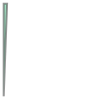

In [122]:
strata_gdf.loc[155961, "geometry"]